__Gene Expression Data visualization using heatmap__

In [37]:
import os
import numpy as np
from genometools.expression import ExpMatrix
from genometools.expression.cluster import bicluster
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode()

# we're using os.path.join() so that we get a valid path on Linux, Mac, and Windows
expression_file1 = os.path.join('..', '2016-python-gene-expression-workshop/data', 'brca_expression_5yr_survive.tsv')

matrix1 = ExpMatrix.read_tsv(expression_file1)

# read the expression data
matrix1 = ExpMatrix.read_tsv(expression_file1)

# sort genes alphabetically
matrix1 = matrix1.sort_index()

# normalize to make sure that the expression values for all the samples sum up to the same value
matrix1 = 1e6*(matrix1/matrix1.sum(axis=0))

# getting rid of noise
matrix1[matrix1<2.0] = 2.0
matrix1 = np.log2(matrix1)

In [38]:
matrix1.head()

<ExpMatrix instance (p=5, n=123, hash="477ecee516966ad0506a166eeeb4304e">

In [39]:
matrix1.describe()

Cells  TCGA-A2-A25E-01A  TCGA-AR-A24L-01A  TCGA-AR-A24Z-01A  TCGA-AO-A03N-01B  \
count      19785.000000      19785.000000      19785.000000      19785.000000   
mean           5.517105          5.518622          5.514656          5.553489   
std            0.624047          0.623325          0.631665          0.513881   
min            4.929435          4.913512          4.906604          5.198759   
25%            4.929435          4.913512          4.906604          5.198759   
50%            5.349303          5.408161          5.390791          5.198759   
75%            6.068153          6.073443          6.072513          5.880489   
max            7.607598          7.544811          7.554025          8.048984   

Cells  TCGA-BH-A0EI-01A  TCGA-B6-A0WY-01A  TCGA-AO-A12D-01A  TCGA-BH-A0AU-01A  \
count      19785.000000      19785.000000      19785.000000      19785.000000   
mean           5.519685          5.518516          5.528892          5.517867   
std            0.622382          0.622084          0.592379          0.623646   
min            4.902219          4.915622          4.986875          4.918993   
25%            4.902219          4.915622          4.986875          4.918993   
50%            5.447618          5.412458          5.340590          5.383722   
75%            6.063160          6.051412          6.022773          6.066233   
max            7.497494          7.511103          7.776105          7.560426   

Cells  TCGA-AR-A1AO-01A  TCGA-AO-A03R-01A        ...         TCGA-A2-A04U-01A  \
count      19785.000000      19785.000000        ...             19785.000000   
mean           5.526971          5.541360        ...                 5.516851   
std            0.600665          0.548012        ...                 0.610438   
min            4.951163          5.128814        ...                 5.015392   
25%            4.951163          5.128814        ...                 5.015392   
50%            5.409937          5.128814        ...                 5.072897   
75%            6.033552          5.942649        ...                 6.022210   
max            7.683718          7.912374        ...                 7.666360   

Cells  TCGA-AR-A0TS-01A  TCGA-AR-A24U-01A  TCGA-B6-A0RT-01A  TCGA-BH-A18K-01A  \
count      19785.000000      19785.000000      19785.000000      19785.000000   
mean           5.520740          5.523619          5.522566          5.523215   
std            0.623473          0.607776          0.616939          0.607026   
min            4.877057          4.955644          4.901345          4.960002   
25%            4.877057          4.955644          4.901345          4.960002   
50%            5.503987          5.353031          5.467817          5.351059   
75%            6.058456          6.048742          6.057183          6.039652   
max            7.462504          7.672042          7.547536          7.645420   

Cells  TCGA-GM-A2DC-01A  TCGA-BH-A0AZ-01A  TCGA-AO-A0JE-01A  TCGA-AR-A0TW-01A  \
count      19785.000000      19785.000000      19785.000000      19785.000000   
mean           5.524246          5.525978          5.522516          5.517191   
std            0.599187          0.599561          0.608247          0.615631   
min            5.010076          4.972763          4.956349          4.987009   
25%            5.010076          4.972763          4.956349          4.987009   
50%            5.173746          5.346885          5.351956          5.152796   
75%            6.033878          6.026439          6.031467          6.045591   
max            7.761117          7.667555          7.603391          7.724313   

Cells  TCGA-AR-A252-01A  
count      19785.000000  
mean           5.522440  
std            0.616435  
min            4.907653  
25%            4.907653  
50%            5.447066  
75%            6.061016  
max            7.549409  

[8 rows x 123 columns]

In [40]:
expression_file2 = os.path.join('..', '2016-python-gene-expression-workshop/data', 'brca_expression_5yr_dead.tsv')
matrix2 = ExpMatrix.read_tsv(expression_file2)
matrix2 = ExpMatrix.read_tsv(expression_file2)
matrix2 = matrix2.sort_index()
matrix2 = 1e6*(matrix2/matrix2.sum(axis=0))

matrix2[matrix2<2.0] = 2.0
matrix2 = np.log2(matrix2)

matrix2.head()

<ExpMatrix instance (p=5, n=30, hash="8d94633fe7ebefa5b5970c934938a64e">

In [41]:
matrix2.describe()

Cells  TCGA-BH-A1EV-01A  TCGA-B6-A0WW-01A  TCGA-LL-A73Z-01A  TCGA-BH-A18J-01A  \
count      19785.000000      19785.000000      19785.000000      19785.000000   
mean           5.521850          5.516478          5.529786          5.522016   
std            0.610715          0.621168          0.590073          0.609287   
min            4.954841          4.955843          4.987464          4.962496   
25%            4.954841          4.955843          4.987464          4.962496   
50%            5.345086          5.263523          5.350204          5.324080   
75%            6.043414          6.057466          6.020231          6.044574   
max            7.648270          7.611896          7.720068          7.641043   

Cells  TCGA-A2-A04P-01A  TCGA-AR-A0TY-01A  TCGA-AC-A62V-01A  TCGA-BH-A1FU-01A  \
count      19785.000000      19785.000000      19785.000000      19785.000000   
mean           5.546984          5.516580          5.510773          5.521348   
std            0.531666          0.618515          0.620737          0.616443   
min            5.161957          4.972567          5.014335          4.920770   
25%            5.161957          4.972567          5.014335          4.920770   
50%            5.161957          5.203319          5.014335          5.418394   
75%            5.914494          6.052736          6.020733          6.054692   
max            7.964899          7.655619          7.656684          7.560795   

Cells  TCGA-BH-A18Q-01A  TCGA-A2-A0YT-01A        ...         TCGA-A2-A3XU-01A  \
count      19785.000000      19785.000000        ...             19785.000000   
mean           5.520325          5.515584        ...                 5.516997   
std            0.621400          0.625630        ...                 0.602198   
min            4.897151          4.937210        ...                 5.065039   
25%            4.897151          4.937210        ...                 5.065039   
50%            5.451226          5.316276        ...                 5.065039   
75%            6.062725          6.067656        ...                 5.987903   
max            7.539027          7.595366        ...                 7.647569   

Cells  TCGA-A2-A0CM-01A  TCGA-A2-A3XY-01A  TCGA-BH-A1EW-01A  TCGA-BH-A0BF-01A  \
count      19785.000000      19785.000000      19785.000000      19785.000000   
mean           5.515961          5.517821          5.515979          5.522351   
std            0.625221          0.623230          0.631565          0.615985   
min            4.933743          4.913361          4.889028          4.906812   
25%            4.933743          4.913361          4.889028          4.906812   
50%            5.332054          5.405778          5.440630          5.464049   
75%            6.064022          6.056388          6.074305          6.050635   
max            7.556003          7.512716          7.516897          7.500388   

Cells  TCGA-BH-A18L-01A  TCGA-BH-A208-01A  TCGA-E9-A1N6-01A  TCGA-B6-A409-01A  \
count      19785.000000      19785.000000      19785.000000      19785.000000   
mean           5.513659          5.530116          5.516777          5.521547   
std            0.628520          0.583677          0.623337          0.599932   
min            4.944417          5.027711          4.933246          5.029641   
25%            4.944417          5.027711          4.933246          5.029641   
50%            5.248634          5.231980          5.339807          5.079915   
75%            6.069301          6.000889          6.057224          6.009985   
max            7.605377          7.727046          7.526956          7.766670   

Cells  TCGA-BH-A1FH-01A  
count      19785.000000  
mean           5.523865  
std            0.615740  
min            4.892006  
25%            4.892006  
50%            5.492781  
75%            6.059844  
max            7.505286  

[8 rows x 30 columns]

In [50]:
# Filtering the expression data for the most variable genes
matrix1 = matrix1.filter_variance(200)
matrix1 = matrix1.center_genes(use_median=True)
matrix_clustered1 = bicluster(matrix1)

fig1 = matrix1.get_figure(emin=-2, emax=2, height=600, width=800, show_sample_labels=False)
iplot(fig1)

[2018-11-02 15:02:38] INFO: Selected the 200 most variable genes (excluded 90.0% of genes, representing 78.8% of total variance).


/anaconda3/lib/python3.6/site-packages/genometools/expression/cluster.py:74: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

/anaconda3/lib/python3.6/site-packages/genometools/expression/cluster.py:74: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



In [51]:
matrix2 = matrix2.filter_variance(200)
matrix2 = matrix2.center_genes(use_median=True)
matrix_clustered2 = bicluster(matrix2)

fig2 = matrix_clustered2.get_figure(emin=-2, emax=2, height=600, width=800, show_sample_labels=False)
iplot(fig2)

[2018-11-02 15:02:43] INFO: Selected the 200 most variable genes (excluded 90.0% of genes, representing 78.7% of total variance).


/anaconda3/lib/python3.6/site-packages/genometools/expression/cluster.py:74: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

/anaconda3/lib/python3.6/site-packages/genometools/expression/cluster.py:74: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



# __Applying PCA__ on the breast cancer dataset

In [ ]:
# lb1 = list(set(list(matrix1)))
# feature1 = {}
# for i in range(len(lb1)):
#     feature1[lb1[i]] = i
    
# lb2 = list(set(list(matrix2)))
# feature2 = {}
# for i in range(len(lb2)):
#     feature2[lb2[i]] = i

In [52]:
expression_values1 = matrix1.values[2:]
# computing covariance matrix
S1  = (1/(expression_values1.shape[0]))*expression_values1.T.dot(expression_values1)
S1  = np.array(S1, dtype = float)

expression_values2 = matrix2.values[2:]
# computing covariance matrix
S2  = (1/(expression_values2.shape[0]))*expression_values2.T.dot(expression_values2)
S2  = np.array(S2, dtype = float)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

eigen_vals1, eigen_vecs1 = np.linalg.eig(S1)
eigen_vals2, eigen_vecs2 = np.linalg.eig(S2)

eigen_pairs1 = [(np.abs(eigen_vals1[i]), eigen_vecs1[:,i]) for i in range(len(eigen_vals1))]
eigen_pairs1.sort()
eigen_pairs1.reverse()

eigen_pairs2 = [(np.abs(eigen_vals2[i]), eigen_vecs2[:,i]) for i in range(len(eigen_vals2))]
eigen_pairs2.sort()
eigen_pairs2.reverse()

print(eigen_pairs1[1][0], eigen_pairs1[2][0], eigen_pairs1[3][0], eigen_pairs1[4][0], eigen_pairs1[5][0], eigen_pairs1[6][0])
print(eigen_pairs2[1][0], eigen_pairs2[2][0], eigen_pairs2[3][0], eigen_pairs2[4][0], eigen_pairs2[5][0], eigen_pairs2[6][0])


matrix_w1 = np.hstack((eigen_pairs1[1][1].reshape(123,1), eigen_pairs1[2][1].reshape(123,1),
                       eigen_pairs1[3][1].reshape(123,1), eigen_pairs1[4][1].reshape(123,1),
                       eigen_pairs1[5][1].reshape(123,1), eigen_pairs1[6][1].reshape(123,1),))

matrix_w2 = np.hstack((eigen_pairs2[1][1].reshape(30,1), eigen_pairs2[2][1].reshape(30,1),
                       eigen_pairs2[3][1].reshape(30,1), eigen_pairs2[4][1].reshape(30,1),
                       eigen_pairs2[5][1].reshape(30,1), eigen_pairs2[6][1].reshape(30,1),))

dataframe1 = pd.DataFrame.from_records(matrix_w1)

dataframe2 = pd.DataFrame.from_records(matrix_w2)

X_lda1 = expression_values1.dot(matrix_w1)
X_lda2 = expression_values2.dot(matrix_w2)

6.795039414666426 4.304434134666208 2.6914846650703073 1.9988134135431335 1.8597988143512894 1.4303740261898341
1.9214853172585162 1.0259237948800994 0.7503106484971741 0.6778529137720251 0.4864365636760566 0.4714141348103028


In [54]:
dataframe1["class"] = 0
np.shape(X_lda1)
print(dataframe1)

            0         1         2         3         4         5  class
0    0.082521 -0.141305 -0.031167 -0.090358  0.018808  0.059566      0
1    0.106888 -0.160617 -0.067992 -0.042069 -0.099056  0.037654      0
2    0.153053 -0.043114  0.040655  0.136845  0.145024 -0.144175      0
3    0.142589  0.082941  0.126518  0.002613 -0.153111 -0.082394      0
4    0.072434 -0.142791  0.039378  0.068956  0.017134 -0.079189      0
5    0.082946  0.010936 -0.086927  0.070851 -0.068092  0.149763      0
6    0.120592  0.139283  0.237977 -0.042784 -0.071605  0.045331      0
7    0.073142 -0.108660 -0.048274 -0.034115  0.122646 -0.015772      0
8    0.097177  0.121074  0.034251 -0.103597  0.020193  0.040491      0
9    0.101757  0.026215 -0.111691 -0.096854  0.040641 -0.016538      0
10   0.114059  0.120769 -0.029912  0.076679  0.033536  0.094436      0
11   0.095323  0.050359  0.063663 -0.059409  0.022461  0.054320      0
12   0.102585 -0.104252 -0.026279  0.042803 -0.099200  0.229975      0
13   0

In [55]:
dataframe2["class"] = 1
np.shape(X_lda2)
print(dataframe2)

           0         1         2         3         4         5  class
0  -0.225033 -0.181832 -0.070254 -0.084901  0.301011  0.064717      1
1  -0.193489  0.028813 -0.029739 -0.081378 -0.045080 -0.148131      1
2  -0.251502 -0.354043  0.121962  0.047301 -0.161687 -0.199265      1
3  -0.228190 -0.066415 -0.185497 -0.211796  0.110962  0.050124      1
4  -0.233324 -0.070682 -0.084955  0.147950  0.116341  0.117428      1
5  -0.169819  0.234161  0.375043  0.039432 -0.056445 -0.150348      1
6  -0.247430  0.288460  0.193018  0.064300 -0.295187  0.093388      1
7  -0.069422 -0.184169 -0.065372 -0.202949 -0.045058 -0.356536      1
8  -0.174062 -0.204201 -0.103594  0.165932 -0.325810  0.053326      1
9  -0.165027  0.042429  0.331464  0.096963  0.102925 -0.054064      1
10 -0.043226  0.093174 -0.109151 -0.172882 -0.175636 -0.035593      1
11 -0.214265  0.050490 -0.152092 -0.305989 -0.023451  0.006215      1
12  0.008275  0.150379  0.096871 -0.261520  0.126610 -0.130589      1
13 -0.069179  0.4080

In [56]:
df = pd.concat([dataframe1, dataframe2], ignore_index=True)
df.columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "Class"]

~ __Breast Cancer Survive (Class 0) - 123 samples__

~ __Breast Cancer dead (Class 1) - 30 samples__

>    - Considered 2000 genes in each category with most variance
>    - Applied PCA on each category and considered the 6 PC's with highest eigen value(most variance)
>    - AConcatenated two data frames (153 samples with a new "Class" column)
>    - Scatter plot on each pair of PC's with "Class" label

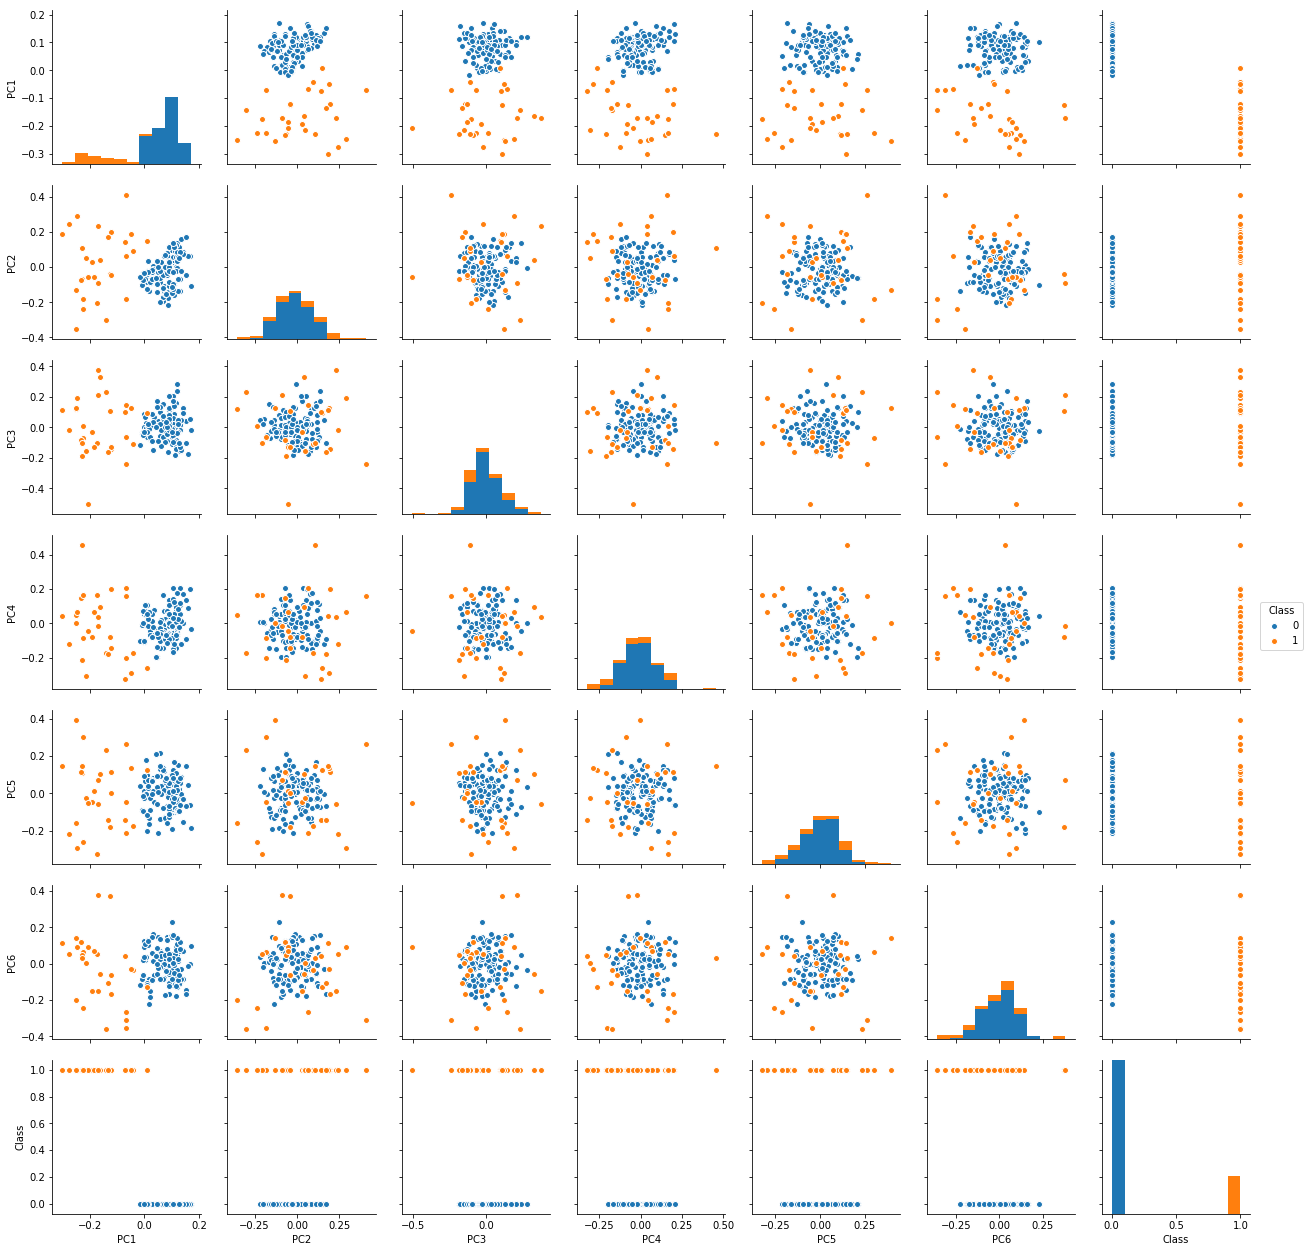

In [57]:
vis1 = sns.pairplot(df, hue="Class")
#fig = vis1.get_fig()
vis1.savefig("lda.png")